In [42]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('car_data.csv')
df

,buying_price,maintanance_price,doors,persons,luggage_boot,safety,unacc_or_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [44]:
df = df.rename(columns={'unacc_or_acc': 'condition'})
df

,buying_price,maintanance_price,doors,persons,luggage_boot,safety,condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintanance_price  1728 non-null   object
 2   doors              1728 non-null   object
 3   persons            1728 non-null   object
 4   luggage_boot       1728 non-null   object
 5   safety             1728 non-null   object
 6   condition          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [46]:
df.isnull().sum()

buying_price         0
maintanance_price    0
doors                0
persons              0
luggage_boot         0
safety               0
condition            0
dtype: int64

In [47]:
df.describe(include = 'all').T   # Transposing the table

,count,unique,top,freq
buying_price,1728,4,vhigh,432
maintanance_price,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
luggage_boot,1728,3,small,576
safety,1728,3,low,576
condition,1728,4,unacc,1210


In [48]:
# generating all the values of all columns using for loop
col_names = ['buying_price', 'maintanance_price', 'doors', 'persons', 'luggage_boot',
       'safety', 'condition']
for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintanance_price, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: luggage_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: condition, dtype: int64


In [49]:
# checking duplicates values

df.duplicated().value_counts()

False    1728
dtype: int64

In [50]:
# if there is duplicate value then the following code will return the duplicate row

df[df.duplicated()]

,buying_price,maintanance_price,doors,persons,luggage_boot,safety,condition


In [51]:
# Data preprocessing technique to transform then categorical variable to numerical variable

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe

OrdinalEncoder()

In [52]:
df['buying_price'] = oe.fit_transform(df[['buying_price']])
df['maintanance_price'] = oe.fit_transform(df[['maintanance_price']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['luggage_boot'] = oe.fit_transform(df[['luggage_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['condition'] = oe.fit_transform(df[['condition']])

In [53]:
df

,buying_price,maintanance_price,doors,persons,luggage_boot,safety,condition
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [54]:
# Creating X & y data

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [55]:
X

,buying_price,maintanance_price,doors,persons,luggage_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0
1724,1.0,1.0,3.0,2.0,1.0,0.0
1725,1.0,1.0,3.0,2.0,0.0,1.0
1726,1.0,1.0,3.0,2.0,0.0,2.0


In [56]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1723    1.0
1724    3.0
1725    2.0
1726    1.0
1727    3.0
Name: condition, Length: 1728, dtype: float64

In [57]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [58]:
X_train.shape

(1209, 6)

In [59]:
X_test.shape

(519, 6)

In [89]:
# importing random forest classifier & creating the object

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc

RandomForestClassifier(random_state=0)

In [90]:
# fitting the data

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [91]:
y_pred = rfc.predict(X_test)
y_pred

array([2., 2., 2., 2., 2., 3., 2., 0., 0., 0., 2., 2., 0., 2., 2., 0., 2.,
       2., 0., 2., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 0.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 0., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 2., 0., 0., 0., 2., 2.,
       2., 2., 1., 2., 2., 2., 0., 2., 2., 2., 3., 2., 0., 0., 2., 2., 2.,
       0., 2., 3., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 1., 0., 2., 2.,
       2., 2., 2., 0., 2., 2., 2., 2., 0., 1., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0., 0., 0., 0., 2.,
       2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 2., 0., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 2., 3., 2., 2.

In [92]:
# evaluate the accuracy report, confusion matrix, classification report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
# Accuracy Score

accuracy_score(y_pred, y_test)

0.9807321772639692

In [94]:
# Confusion Matrix

cm = confusion_matrix(y_pred,y_test)
cm

array([[110,   1,   2,   1],
       [  2,  23,   0,   0],
       [  2,   0, 361,   0],
       [  1,   1,   0,  15]])

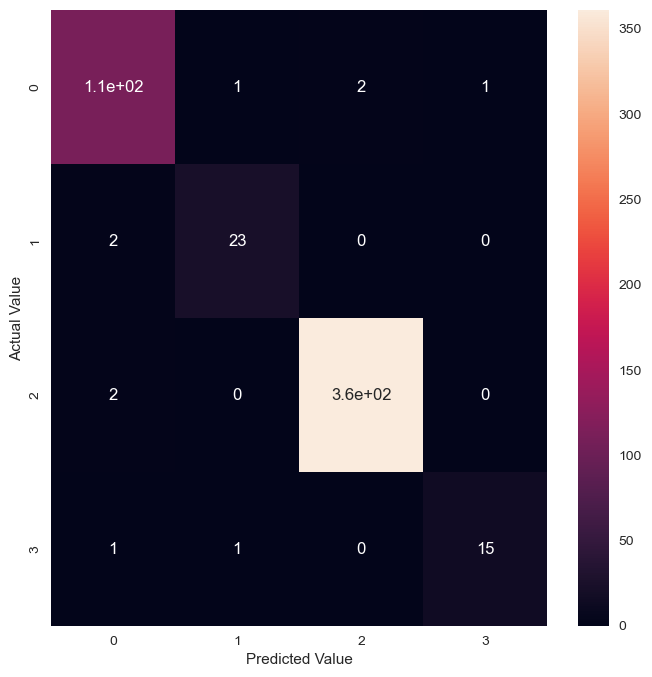

In [95]:
# heatmap of the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [96]:
# classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       114
         1.0       0.92      0.92      0.92        25
         2.0       0.99      0.99      0.99       363
         3.0       0.94      0.88      0.91        17

    accuracy                           0.98       519
   macro avg       0.95      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519



# we have 98.26% accurate model. But we have increase our accuracy of the model by hyper parameter tuning.

In [97]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [98]:
from yellowbrick.model_selection import validation_curve

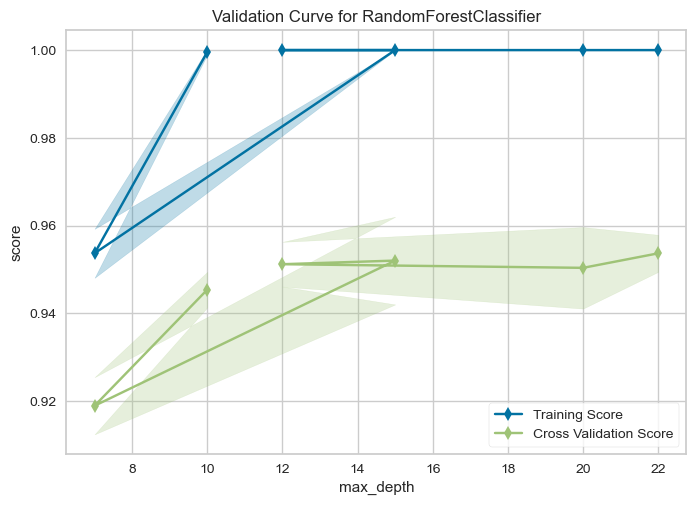

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [99]:
# Finding out tree depth where model gives best accuracy
tree_depth = [ 10,7,15,12,20,22]

print(validation_curve(RandomForestClassifier(), X= X_train, y = y_train, param_name= 'max_depth', param_range = tree_depth, scoring = 'accuracy', cv = 3))

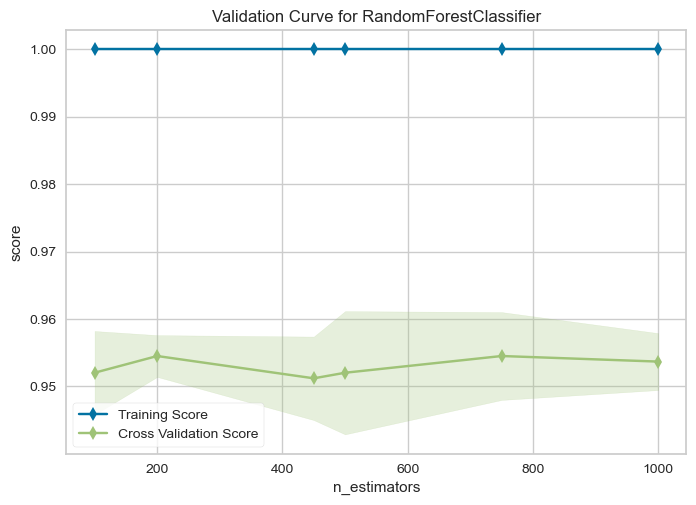

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [100]:
# Finding out exact number of estimators where model gives best accuracy
num_est = [ 100,200,450,500,750,1000]

print(validation_curve(RandomForestClassifier(), X= X_train, y = y_train, param_name= 'n_estimators', param_range = num_est, scoring = 'accuracy', cv = 3))

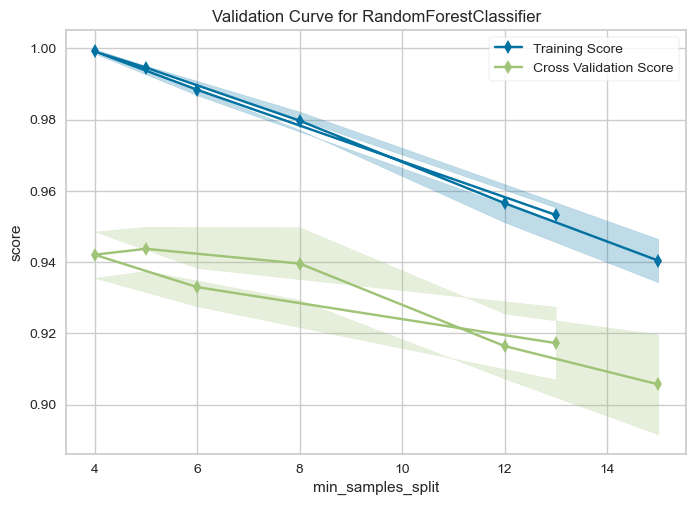

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([13,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [101]:
# Finding out minimum samples where model gives best accuracy
min_samples = [ 13,6,4,5,8,12,15]

print(validation_curve(RandomForestClassifier(), X= X_train, y = y_train, param_name= 'min_samples_split', param_range = min_samples, scoring = 'accuracy', cv = 3))

In [102]:
# Now creating a new classifier model

model_new = RandomForestClassifier(n_estimators=1000, min_samples_split=4, max_depth=12, random_state=0)
model_new

RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=1000,
                       random_state=0)

In [103]:
# fitting the data into the new model

model_new.fit(X_train, y_train)



RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=1000,
                       random_state=0)

In [107]:
# predicting the data
y_pred_new = model_new.predict(X_test)
y_pred_new

array([2., 2., 2., 2., 2., 3., 2., 0., 0., 0., 2., 2., 0., 2., 2., 0., 2.,
       2., 0., 2., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2., 3., 0., 2., 0.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 0., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 2., 0., 0., 0., 2., 2.,
       2., 2., 1., 2., 2., 2., 0., 2., 2., 2., 3., 2., 0., 0., 2., 2., 2.,
       0., 2., 3., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 1., 0., 2., 2.,
       2., 2., 2., 0., 2., 2., 2., 2., 0., 1., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0., 0., 0., 0., 2.,
       2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 2., 0., 2., 1.,
       2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 2., 3., 2., 2.

In [108]:
print(accuracy_score(y_pred_new, y_test)*100)

97.6878612716763


# we got little bit less % because we have not set other hypertunings 

In [109]:
# getting the features scores

feature_scores = pd.Series(model_new.feature_importances_, index= X_train.columns).sort_values(ascending=False)
print(feature_scores)

safety               0.298855
persons              0.248409
buying_price         0.174043
maintanance_price    0.138342
luggage_boot         0.080306
doors                0.060045
dtype: float64


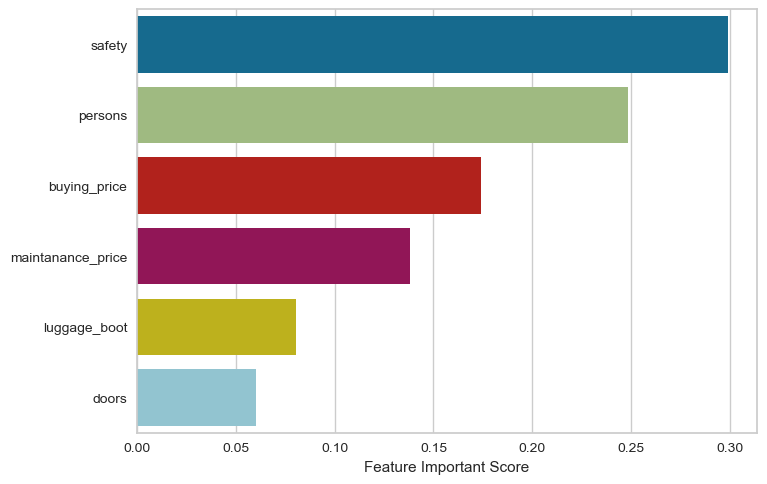

In [111]:
sns.barplot(x= feature_scores, y= feature_scores.index)
plt.xlabel('Feature Important Score')
plt.show()

# from this barplot we got the important of each parameter considered by the buyer when they are buying a car

In [113]:
# creating another new model without maintainance, doors, luggage_boot

model_reconsidered = RandomForestClassifier()

Xn = df.drop(['doors','luggage_boot','maintanance_price'], axis = 'columns')
yn = df['condition']


In [114]:
# training our data

Xn_train, Xn_test, yn_train, yn_test =train_test_split(Xn,yn, test_size=0.3, random_state=0)

In [115]:
# fitting the data

model_reconsidered.fit(Xn_train,yn_train)

RandomForestClassifier()

In [117]:
new_pred = model_reconsidered.predict(Xn_test)
new_pred

array([2., 2., 2., 2., 2., 1., 2., 0., 0., 2., 2., 2., 0., 2., 2., 0., 2.,
       2., 0., 2., 1., 0., 0., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 0.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 2., 2.,
       2., 2., 1., 2., 2., 2., 0., 2., 2., 2., 3., 2., 0., 0., 2., 2., 2.,
       0., 2., 3., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 1., 0., 2., 2.,
       2., 2., 2., 3., 2., 2., 2., 2., 0., 1., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0., 0., 0., 0., 2.,
       2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 2., 0., 2., 1.,
       2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 2., 3., 2., 2.

In [118]:
print(accuracy_score(new_pred, yn_test)*100)

100.0


# Now we are getting 100% accurate model by removing less weightage of unimportant features